In [ ]:
import math
import os
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,DenseNet201,ResNet101
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import backend as K
import gc
import json
import itertools
import glob
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
transformed_validation_imgs = np.load("/content/drive/Shared drives/BTP_Arya/BTP_Evaluation/transformed_validation_imgs.npy")
transformed_train_imgs = np.load("/content/drive/Shared drives/BTP_Arya/BTP_Evaluation/transformed_train_imgs.npy")
train_labels_enc = np.load("/content/drive/Shared drives/BTP_Arya/BTP_Evaluation/train_labels_enc.npy")
validation_labels_enc = np.load("/content/drive/Shared drives/BTP_Arya/BTP_Evaluation/validation_labels_enc.npy")

In [ ]:
# !pip install git+https://github.com/qubvel/efficientnet

In [ ]:
# import efficientnet.keras as efn

In [ ]:
input_shape=(224,224,3)

In [ ]:
# model = Sequential()
# efficient_net = efn.EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)
# #efficient_net.trainable = False
# for index, layer in enumerate(efficient_net.layers):
#     if index < 761:
#         layer.trainable = False

258441216/258434480 [==============================] - 3s 0us/step


In [ ]:
# train_aug=[]
# train_aug_labels=[]
# cnt=0
# for i in transformed_train_imgs:
#   train_aug.append(i)
#   train_aug.append(np.rot90(i))
#   train_aug.append(np.rot90(i,2))
#   train_aug.append(np.rot90(i,3))
#   train_aug_labels.append(train_labels_enc[cnt])
#   train_aug_labels.append(train_labels_enc[cnt])
#   train_aug_labels.append(train_labels_enc[cnt])
#   train_aug_labels.append(train_labels_enc[cnt])
#   cnt=cnt+1


In [ ]:
# train_aug=np.array(train_aug)
# train_aug_labels=np.array(train_aug_labels)

In [ ]:
# s = np.arange(train_aug.shape[0])
# np.random.shuffle(s)
# train_aug = train_aug[s]
# train_aug_labels = train_aug_labels[s]

In [ ]:
# np.save("train_aug.npy", train_aug)
# np.save("train_aug_labels.npy", train_aug_labels)

In [ ]:
# train_aug = np.load("train_aug.npy")
# train_aug_labels =np.load("train_aug_labels.npy")

In [ ]:
# X = transformed_train_imgs
# y = train_labels_enc
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# ## 70% 30%

In [ ]:
# np.save("x_train.npy", x_train)
# np.save("x_val.npy", x_val)
# np.save("y_train.npy", y_train)
# np.save("y_val.npy", y_val)

In [ ]:
lr=1e-5

model = Sequential()
model.add(ResNet101(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

171450368/171446536 [==============================] - 2s 0us/step


In [ ]:
history = model.fit(x=x_train, y=y_train,validation_data=(x_val, y_val),batch_size=40,epochs=60,verbose=1)

Train on 1083 samples, validate on 271 samples
Epoch 1/60
1083/1083 [==============================] - 86s 79ms/step - loss: 1.1019 - accuracy: 0.3518 - val_loss: 1.0506 - val_accuracy: 0.2509
Epoch 2/60
1083/1083 [==============================] - 79s 73ms/step - loss: 1.0527 - accuracy: 0.3444 - val_loss: 1.0393 - val_accuracy: 0.2509
Epoch 3/60
1083/1083 [==============================] - 79s 73ms/step - loss: 1.0311 - accuracy: 0.3693 - val_loss: 1.0333 - val_accuracy: 0.2509
Epoch 4/60
1083/1083 [==============================] - 79s 73ms/step - loss: 1.0150 - accuracy: 0.3970 - val_loss: 1.0269 - val_accuracy: 0.2509
Epoch 5/60
1083/1083 [==============================] - 79s 73ms/step - loss: 0.9885 - accuracy: 0.4054 - val_loss: 1.0205 - val_accuracy: 0.2509
Epoch 6/60
1083/1083 [==============================] - 79s 73ms/step - loss: 0.9859 - accuracy: 0.4118 - val_loss: 1.0130 - val_accuracy: 0.2509
Epoch 7/60
1083/1083 [==============================] - 79s 73ms/step - loss:

In [ ]:
loss,acc = model.evaluate(transformed_validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 87.86%


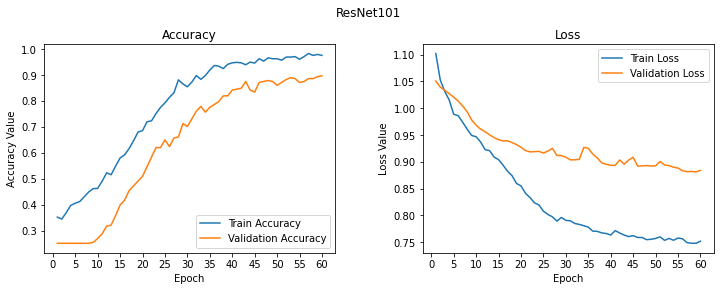

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('ResNet101', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,61))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 61, 5))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 61, 5))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('resnet101-updated.h5')
# model = load_model('resnet101-updated.h5')

In [ ]:
lr=1e-5

model = Sequential()
model.add(ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
history = model.fit(x=x_train, y=y_train,validation_data=(x_val, y_val),batch_size=50,epochs=30,verbose=1)

Train on 1083 samples, validate on 271 samples
Epoch 1/30
1083/1083 [==============================] - 62s 57ms/step - loss: 0.9502 - accuracy: 0.6085 - val_loss: 0.9432 - val_accuracy: 0.7343
Epoch 2/30
1083/1083 [==============================] - 46s 42ms/step - loss: 0.9265 - accuracy: 0.6260 - val_loss: 0.9319 - val_accuracy: 0.7454
Epoch 3/30
1083/1083 [==============================] - 46s 42ms/step - loss: 0.9083 - accuracy: 0.6500 - val_loss: 0.9243 - val_accuracy: 0.7417
Epoch 4/30
1083/1083 [==============================] - 46s 42ms/step - loss: 0.8845 - accuracy: 0.6787 - val_loss: 0.9160 - val_accuracy: 0.7417
Epoch 5/30
1083/1083 [==============================] - 46s 42ms/step - loss: 0.8603 - accuracy: 0.7054 - val_loss: 0.9040 - val_accuracy: 0.7380
Epoch 6/30
1083/1083 [==============================] - 46s 42ms/step - loss: 0.8482 - accuracy: 0.7202 - val_loss: 0.8867 - val_accuracy: 0.7491
Epoch 7/30
1083/1083 [==============================] - 46s 42ms/step - loss:

In [ ]:
loss,acc = model.evaluate(transformed_validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 85.89%


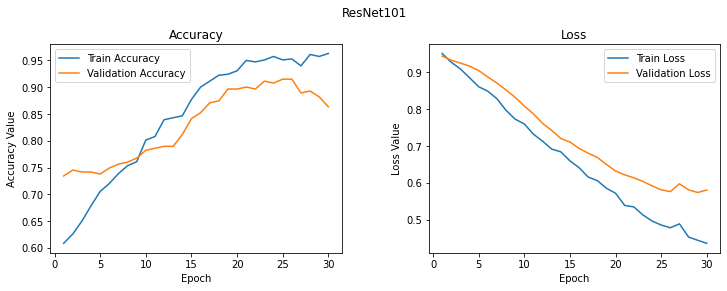

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('ResNet101', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


###IT IS ResNet50..save history next time.

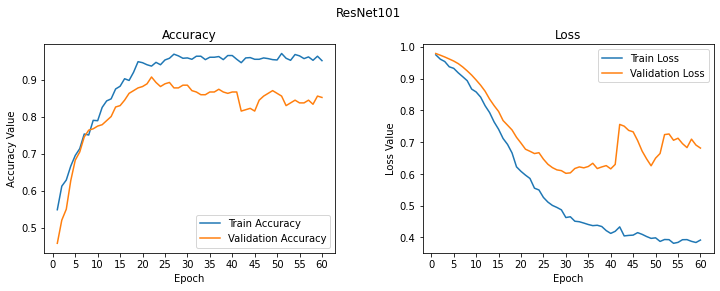

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('ResNet101', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,61))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 61, 5))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 61, 5))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('resnet50-updated.h5')

# model = load_model('/content/drive/My Drive/resnet50-updated.h5')

In [ ]:
lr=1e-5

model = Sequential()
model.add(ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

In [ ]:
history = model.fit(x=transformed_train_imgs, y=train_labels_enc,validation_data=(transformed_validation_imgs, validation_labels_enc),batch_size=50,epochs=100,verbose=1)

Train on 1354 samples, validate on 659 samples
Epoch 1/100
1354/1354 [==============================] - 84s 62ms/step - loss: 0.9395 - accuracy: 0.6182 - val_loss: 0.9468 - val_accuracy: 0.7071
Epoch 2/100
1354/1354 [==============================] - 60s 45ms/step - loss: 0.9094 - accuracy: 0.6632 - val_loss: 0.9405 - val_accuracy: 0.7056
Epoch 3/100
1354/1354 [==============================] - 60s 44ms/step - loss: 0.8854 - accuracy: 0.6713 - val_loss: 0.9259 - val_accuracy: 0.7086
Epoch 4/100
1354/1354 [==============================] - 60s 45ms/step - loss: 0.8616 - accuracy: 0.6861 - val_loss: 0.9087 - val_accuracy: 0.7071
Epoch 5/100
1354/1354 [==============================] - 60s 44ms/step - loss: 0.8302 - accuracy: 0.7024 - val_loss: 0.8876 - val_accuracy: 0.7071
Epoch 6/100
1354/1354 [==============================] - 60s 45ms/step - loss: 0.8163 - accuracy: 0.6824 - val_loss: 0.8611 - val_accuracy: 0.7086
Epoch 7/100
1354/1354 [==============================] - 60s 45ms/step 

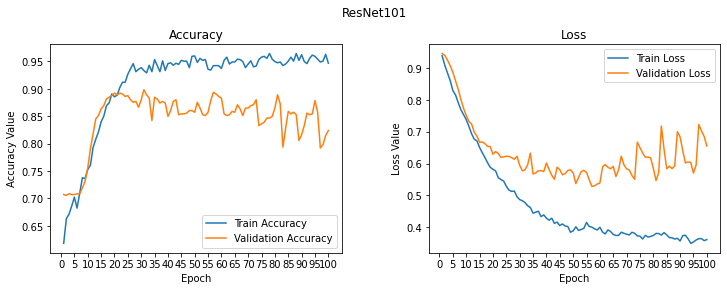

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('ResNet101', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
###IT IS ResNet50..save history next time.

In [ ]:
model.save('resnet50-new2.h5')

In [ ]:
lr=1e-5
model = Sequential()
model.add(DenseNet201(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

In [ ]:
history = model.fit(x=transformed_train_imgs, y=train_labels_enc,validation_data=(transformed_validation_imgs, validation_labels_enc),batch_size=30,epochs=100,verbose=1)

Train on 1354 samples, validate on 659 samples
Epoch 1/100
1354/1354 [==============================] - 130s 96ms/step - loss: 0.9341 - accuracy: 0.6588 - val_loss: 0.9378 - val_accuracy: 0.7011
Epoch 2/100
1354/1354 [==============================] - 117s 87ms/step - loss: 0.9102 - accuracy: 0.6728 - val_loss: 0.9117 - val_accuracy: 0.7071
Epoch 3/100
1354/1354 [==============================] - 117s 87ms/step - loss: 0.8825 - accuracy: 0.6861 - val_loss: 0.8789 - val_accuracy: 0.7071
Epoch 4/100
1354/1354 [==============================] - 117s 87ms/step - loss: 0.8572 - accuracy: 0.6817 - val_loss: 0.8410 - val_accuracy: 0.7086
Epoch 5/100
1354/1354 [==============================] - 117s 87ms/step - loss: 0.8329 - accuracy: 0.6883 - val_loss: 0.8027 - val_accuracy: 0.7314
Epoch 6/100
1354/1354 [==============================] - 117s 87ms/step - loss: 0.7976 - accuracy: 0.6987 - val_loss: 0.7568 - val_accuracy: 0.7481
Epoch 7/100
1354/1354 [==============================] - 118s 87m

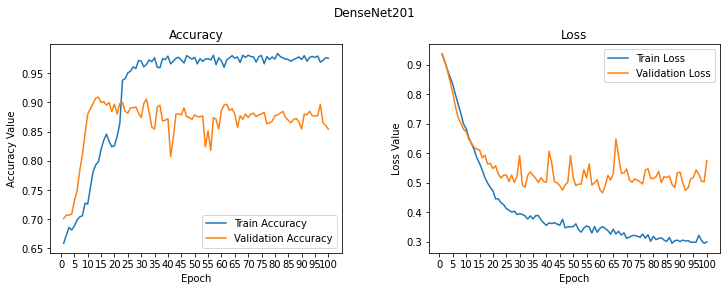

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DenseNet201', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('densenet-new.h5')

In [ ]:
loss,acc = model.evaluate(transformed_validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 88.47%


In [ ]:
### implementing similarity between image .

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
import numpy as np
from os import listdir, walk
from os.path import isfile, join
import itertools

# def getAllFilesInDirectory(directoryPath: str):
#     return [(directoryPath + "/" + f) for f in listdir(directoryPath) if isfile(join(directoryPath, f))]

def predict(img, model: Model):
  # def predict(img_path : str, model: Model):

    # img = image.load_img(img_path, target_size=(224, 224))
    # x = image.img_to_array(img)

    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    return model.predict(x)

def findDifference(f1, f2):
    return np.linalg.norm(f1-f2)

def findDifferences(feature_vectors):
    similar: dict = {}
    keys = [k for k,v in feature_vectors.items()]
    min : dict = {}
    for k in keys:
        min[k] = 10000000
    possible_combinations=list(itertools.combinations(keys, 2))
    for k,v in possible_combinations:
       diff=findDifference(feature_vectors[k],feature_vectors[v])
       if(diff < min[k]):
           min[k] = diff
           similar[k] = v
           min[v] = diff
           similar[v] = k
    return similar 




In [ ]:
feature_vectors: dict = {}
model = ResNet50(weights='imagenet')
cnt=0
for img in transformed_train_imgs:
      feature_vectors[cnt] = predict(img,model)[0]
      cnt=cnt+1;
    # predict(img,model)[0]
    # print("predicted ",img)
results=findDifferences(feature_vectors)
for k,v in results.items():
    print(k ," is most similar to: ", v)    
#print('Predicted:', decode_predictions(preds, top=3)[0])

0  is most similar to:  502
1  is most similar to:  1318
2  is most similar to:  1194
4  is most similar to:  1160
6  is most similar to:  39
14  is most similar to:  683
16  is most similar to:  1238
123  is most similar to:  547
214  is most similar to:  1346
230  is most similar to:  652
502  is most similar to:  0
8  is most similar to:  996
13  is most similar to:  456
20  is most similar to:  49
95  is most similar to:  137
701  is most similar to:  993
993  is most similar to:  1318
1318  is most similar to:  1282
3  is most similar to:  880
5  is most similar to:  277
160  is most similar to:  356
1194  is most similar to:  2
25  is most similar to:  1251
48  is most similar to:  584
56  is most similar to:  880
447  is most similar to:  880
880  is most similar to:  1336
7  is most similar to:  1053
9  is most similar to:  600
10  is most similar to:  558
22  is most similar to:  679
75  is most similar to:  585
1160  is most similar to:  1247
18  is most similar to:  742
24  

0


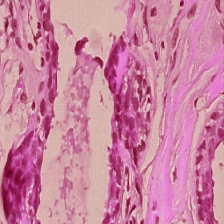

In [ ]:
print(train_labels_enc[106])  
array_to_img(transformed_train_imgs[106])
     

1


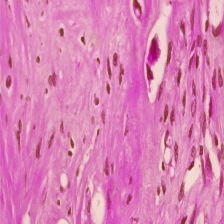

In [ ]:
print(train_labels_enc[1326])  
array_to_img(transformed_train_imgs[1326])


In [ ]:
import cv2
import numpy as np

# Find the Gaussian pyramid of the two images and the mask
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr
 
# Then calculate the Laplacian pyramid
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

# Now blend the two images wrt. the mask
def blend(laplacian_A,laplacian_B,mask_pyr):
    LS = []
    for la,lb,mask in zip(laplacian_A,laplacian_B,mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        LS.append(ls)
    return LS
    
# Reconstruct the original image
def reconstruct(laplacian_pyr):
    laplacian_top = laplacian_pyr[0]
    laplacian_lst = [laplacian_top]
    num_levels = len(laplacian_pyr) - 1
    for i in range(num_levels):
        size = (laplacian_pyr[i + 1].shape[1], laplacian_pyr[i + 1].shape[0])
        laplacian_expanded = cv2.pyrUp(laplacian_top, dstsize=size)
        laplacian_top = cv2.add(laplacian_pyr[i+1], laplacian_expanded)
        laplacian_lst.append(laplacian_top)
    return laplacian_lst
 


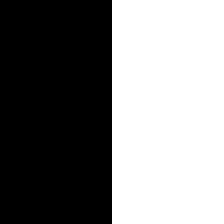

In [ ]:
mask = np.zeros((224,224,3), dtype='float32')
mask[0:224,112:224,:] = (1,1,1)
array_to_img(mask)

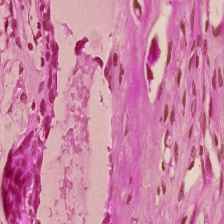

In [ ]:
img1=transformed_train_imgs[106]
img2=transformed_train_imgs[1326]

# Create the mask
# mask = np.zeros((1000,1800,3), dtype='float32')
# mask[250:500,640:1440,:] = (1,1,1)
mask = np.zeros((224,224,3), dtype='float32')
mask[0:224,112:224,:] = (1,1,1)

num_levels = 7

# For image-1, calculate Gaussian and Laplacian
gaussian_pyr_1 = gaussian_pyramid(img1, num_levels)
laplacian_pyr_1 = laplacian_pyramid(gaussian_pyr_1)
# For image-2, calculate Gaussian and Laplacian
gaussian_pyr_2 = gaussian_pyramid(img2, num_levels)
laplacian_pyr_2 = laplacian_pyramid(gaussian_pyr_2)
# Calculate the Gaussian pyramid for the mask image and reverse it.
mask_pyr_final = gaussian_pyramid(mask, num_levels)
mask_pyr_final.reverse()
# Blend the images
add_laplace = blend(laplacian_pyr_1,laplacian_pyr_2,mask_pyr_final)
# Reconstruct the images
final  = reconstruct(add_laplace)
new_img=final[num_levels]
array_to_img(new_img)
# Save the final image to the disk
# cv2.imwrite('new.jpg',final[num_levels])

In [ ]:
mask = np.zeros((224,224,3), dtype='float32')
mask[0:224,112:224,:] = (1,1,1)
new_train_images=[]
new_train_labels=[]
for k,v in results.items():
  img1=transformed_train_imgs[k]
  img2=transformed_train_imgs[v]
  num_levels = 7
  # For image-1, calculate Gaussian and Laplacian
  gaussian_pyr_1 = gaussian_pyramid(img1, num_levels)
  laplacian_pyr_1 = laplacian_pyramid(gaussian_pyr_1)


  
  # For image-2, calculate Gaussian and Laplacian
  gaussian_pyr_2 = gaussian_pyramid(img2, num_levels)
  laplacian_pyr_2 = laplacian_pyramid(gaussian_pyr_2)
  # Calculate the Gaussian pyramid for the mask image and reverse it.
  mask_pyr_final = gaussian_pyramid(mask, num_levels)
  mask_pyr_final.reverse()
  # Blend the images
  add_laplace = blend(laplacian_pyr_1,laplacian_pyr_2,mask_pyr_final)
  # Reconstruct the images
  final  = reconstruct(add_laplace)
  if(train_labels_enc[v]==train_labels_enc[k]):
    new_train_images.append(final[num_levels])
  if(train_labels_enc[v]==0 and train_labels_enc[k]==0):
    new_train_labels.append(0)
  elif(train_labels_enc[v]==1 and train_labels_enc[k]==1):
    new_train_labels.append(1)


In [ ]:
new_train_images=np.array(new_train_images)

In [ ]:
print(new_train_images.shape)
# print(new_train_labels.shape)

(864, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(new_train_labels)
new_train_labels = le.transform(new_train_labels)

In [ ]:
print(new_train_labels[1:100])
    

[1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0]


In [ ]:
print(new_train_labels.shape)

(864,)


In [ ]:
np.save("new_train_images.npy", new_train_images)
np.save("new_train_labels.npy", new_train_labels)

In [ ]:
lr=1e-5

model = Sequential()
model.add(ResNet101(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

In [ ]:
history = model.fit(x=new_train_images, y=new_train_labels,validation_data=(transformed_validation_imgs, validation_labels_enc),batch_size=40,epochs=45,verbose=1)

Train on 864 samples, validate on 659 samples
Epoch 1/45
864/864 [==============================] - 116s 134ms/step - loss: 0.9500 - accuracy: 0.6678 - val_loss: 0.9581 - val_accuracy: 0.7071
Epoch 2/45
864/864 [==============================] - 69s 80ms/step - loss: 0.9336 - accuracy: 0.6921 - val_loss: 0.9519 - val_accuracy: 0.7071
Epoch 3/45
864/864 [==============================] - 69s 80ms/step - loss: 0.9137 - accuracy: 0.7419 - val_loss: 0.9426 - val_accuracy: 0.7071
Epoch 4/45
864/864 [==============================] - 69s 80ms/step - loss: 0.9051 - accuracy: 0.7292 - val_loss: 0.9318 - val_accuracy: 0.7071
Epoch 5/45
864/864 [==============================] - 69s 80ms/step - loss: 0.8849 - accuracy: 0.7407 - val_loss: 0.9203 - val_accuracy: 0.7071
Epoch 6/45
864/864 [==============================] - 69s 80ms/step - loss: 0.8515 - accuracy: 0.7743 - val_loss: 0.9086 - val_accuracy: 0.7071
Epoch 7/45
864/864 [==============================] - 69s 80ms/step - loss: 0.8356 - acc

In [ ]:
loss,acc = model.evaluate(transformed_validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 87.10%


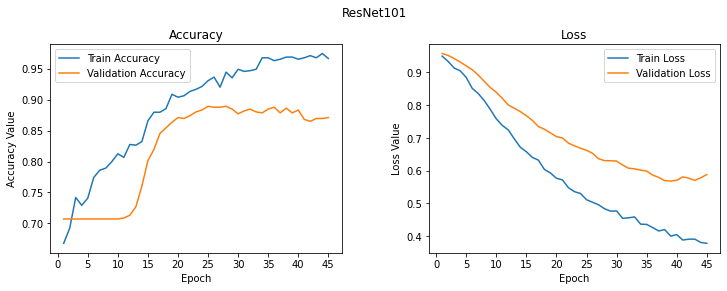

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('ResNet101', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,46))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## changed acc to accuracy in history.history
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 46, 5))

ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 46, 5))

ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('resnet101-newdata.h5')

In [ ]:
new_train_images = np.load("/content/drive/My Drive/new_train_images.npy")
new_train_labels = np.load("/content/drive/My Drive/new_train_labels.npy")

In [ ]:
final_train_image=np.concatenate((transformed_train_imgs,new_train_images),axis=0)
final_train_labels=np.concatenate((train_labels_enc,new_train_labels),axis=0)

In [ ]:
print(final_train_image.shape)
print(final_train_labels.shape)

(2218, 224, 224, 3)
(2218,)


In [ ]:
np.save("final_train_image.npy", final_train_image)
np.save("final_train_labels.npy", final_train_labels)

In [ ]:
lr=1e-5

model = Sequential()
model.add(ResNet101(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

In [ ]:
history = model.fit(x=final_train_image, y=final_train_labels,validation_data=(transformed_validation_imgs, validation_labels_enc),batch_size=40,epochs=40,verbose=1)

Train on 2218 samples, validate on 659 samples
Epoch 1/40
2218/2218 [==============================] - 120s 54ms/step - loss: 0.9922 - accuracy: 0.4833 - val_loss: 0.9701 - val_accuracy: 0.5964
Epoch 2/40
2218/2218 [==============================] - 78s 35ms/step - loss: 0.9618 - accuracy: 0.6330 - val_loss: 0.9635 - val_accuracy: 0.7102
Epoch 3/40
2218/2218 [==============================] - 78s 35ms/step - loss: 0.9441 - accuracy: 0.7196 - val_loss: 0.9574 - val_accuracy: 0.7663
Epoch 4/40
2218/2218 [==============================] - 78s 35ms/step - loss: 0.9321 - accuracy: 0.7647 - val_loss: 0.9428 - val_accuracy: 0.8483
Epoch 5/40
2218/2218 [==============================] - 78s 35ms/step - loss: 0.9151 - accuracy: 0.7913 - val_loss: 0.9175 - val_accuracy: 0.8741
Epoch 6/40
2218/2218 [==============================] - 78s 35ms/step - loss: 0.8927 - accuracy: 0.8111 - val_loss: 0.8871 - val_accuracy: 0.8832
Epoch 7/40
2218/2218 [==============================] - 78s 35ms/step - loss

In [ ]:
loss,acc = model.evaluate(transformed_validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 91.05%


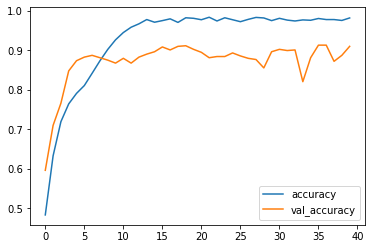

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()


In [ ]:
model.save('resnet101-new_train.h5')

In [ ]:
np.save("history-resnet101-final-train.npy", history)

In [ ]:
final_train_image = np.load("/content/drive/My Drive/final_train_image.npy")
final_train_labels = np.load("/content/drive/My Drive/final_train_labels.npy")

In [ ]:
lr=2*1e-5
# print(lr)
model = Sequential()
model.add(DenseNet201(weights='imagenet',include_top=False,input_shape=(224,224,3)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.l2(1e-4),  activity_regularizer=regularizers.l2(1e-5)


model.add(layers.Dense(512, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(128, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(32, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-4)))

model.add(layers.Dense(8, activation='relu',kernel_initializer='random_normal',
    bias_initializer='zeros',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='random_normal',
#     bias_initializer='zeros'))
model.add(layers.Dense(1, activation='sigmoid'))   
model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy'] )

In [ ]:
history = model.fit(x=final_train_image, y=final_train_labels,validation_data=(transformed_validation_imgs, validation_labels_enc),batch_size=40,epochs=50,verbose=1)

Train on 2218 samples, validate on 659 samples
Epoch 1/50
2218/2218 [==============================] - 206s 93ms/step - loss: 0.8626 - accuracy: 0.6979 - val_loss: 0.8578 - val_accuracy: 0.7071
Epoch 2/50
2218/2218 [==============================] - 97s 44ms/step - loss: 0.7807 - accuracy: 0.7250 - val_loss: 0.7529 - val_accuracy: 0.7102
Epoch 3/50
2218/2218 [==============================] - 97s 44ms/step - loss: 0.7196 - accuracy: 0.7263 - val_loss: 0.6906 - val_accuracy: 0.7481
Epoch 4/50
2218/2218 [==============================] - 97s 44ms/step - loss: 0.6563 - accuracy: 0.7813 - val_loss: 0.6409 - val_accuracy: 0.8194
Epoch 5/50
2218/2218 [==============================] - 97s 44ms/step - loss: 0.5963 - accuracy: 0.8269 - val_loss: 0.6305 - val_accuracy: 0.8710
Epoch 6/50
2218/2218 [==============================] - 97s 44ms/step - loss: 0.5442 - accuracy: 0.8454 - val_loss: 0.5996 - val_accuracy: 0.8907
Epoch 7/50
2218/2218 [==============================] - 97s 44ms/step - loss

In [ ]:
history = model.fit(x=final_train_image, y=final_train_labels,validation_data=(transformed_validation_imgs, validation_labels_enc),batch_size=40,epochs=2,verbose=1)

In [ ]:
loss,acc = model.evaluate(transformed_validation_imgs,  validation_labels_enc, verbose=2)
print("accuracy: {:5.2f}%".format(100*acc))

accuracy: 93.63%


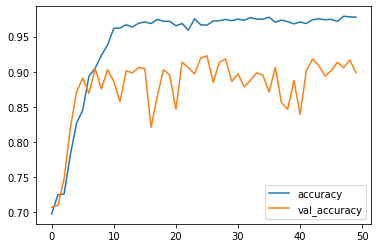

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.save('densenet201-new_train.h5')
# np.save("history-densenet201-final-train.npy", history)